In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
x = pd.read_csv("pollution_dataset.csv")
x

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [15]:
x["Air Quality"].value_counts()

,count
Air Quality,
Good,2000
Moderate,1500
Poor,1000
Hazardous,500


In [21]:
tmp = x[x["Air Quality"] == 'Good'].sample(frac=0.25)
tmp = pd.concat([tmp, x[x["Air Quality"] == 'Hazardous']])
tmp

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
2313,22.6,61.0,18.8,25.7,15.0,2.2,1.02,14.7,298,Good
837,28.1,39.9,2.8,7.6,18.2,4.8,1.08,10.8,470,Good
2681,29.5,69.6,17.5,26.1,12.0,4.8,1.14,13.7,531,Good
1200,23.1,58.3,3.2,7.3,12.9,5.9,1.03,11.9,295,Good
2364,17.8,57.7,1.2,6.8,27.1,3.0,0.95,10.9,453,Good
...,...,...,...,...,...,...,...,...,...,...
4981,41.5,94.0,62.1,79.4,30.0,20.0,2.80,7.8,547,Hazardous
4986,35.6,103.8,74.5,93.3,31.8,23.6,2.04,20.8,757,Hazardous
4989,44.4,102.1,35.4,54.7,55.5,25.5,1.79,3.0,772,Hazardous
4990,46.8,93.8,11.8,25.4,33.8,28.7,3.27,3.7,589,Hazardous


<Axes: ylabel='Air Quality'>

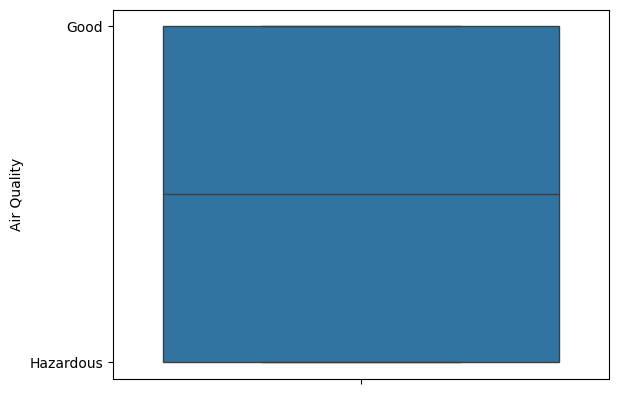

In [22]:
# tmp = x[(x["Air Quality"] == 'Good') | (x["Air Quality"] == 'Hazardous')]

# tmp['Air Quality']
sns.boxplot(tmp['Air Quality'])

№1

<Axes: xlabel='CO', ylabel='NO2'>

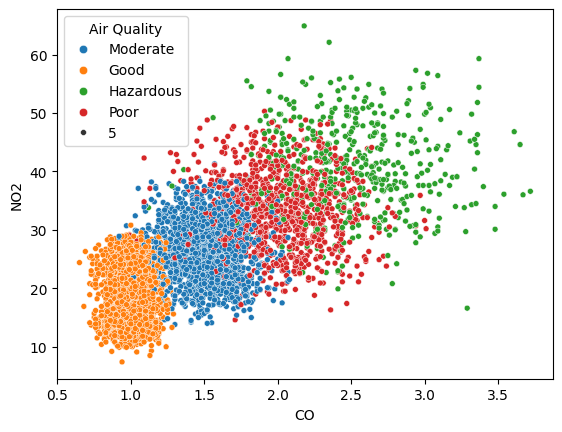

In [11]:
sns.scatterplot(data=x, x="CO", y="NO2", hue="Air Quality", size=5)

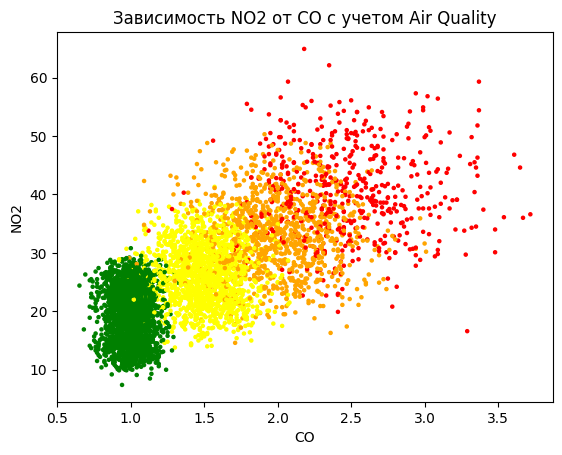

In [2]:
color = {
    "Good": "green",
    "Moderate": "yellow",
    "Poor": "orange",
    "Hazardous": "red"
}
plt.scatter(x["CO"], x["NO2"], c = list(map(lambda i: color[i], x["Air Quality"])), s = 5)
plt.title("Зависимость NO2 от CO с учетом Air Quality")
plt.xlabel("CO")
plt.ylabel("NO2")
plt.show()
#Выводы: чем хуже качество воздуха, тем в нем больше NO2 и CO

№2

<ipython-input-3-f7112374735c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x["Population_Density"], color='green', ax=ax[0, 1])
<ipython-input-3-f7112374735c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x["Temperature"], color='red', ax=ax[1, 0])
<ipython-input-3-f7112374735c>:13: Use

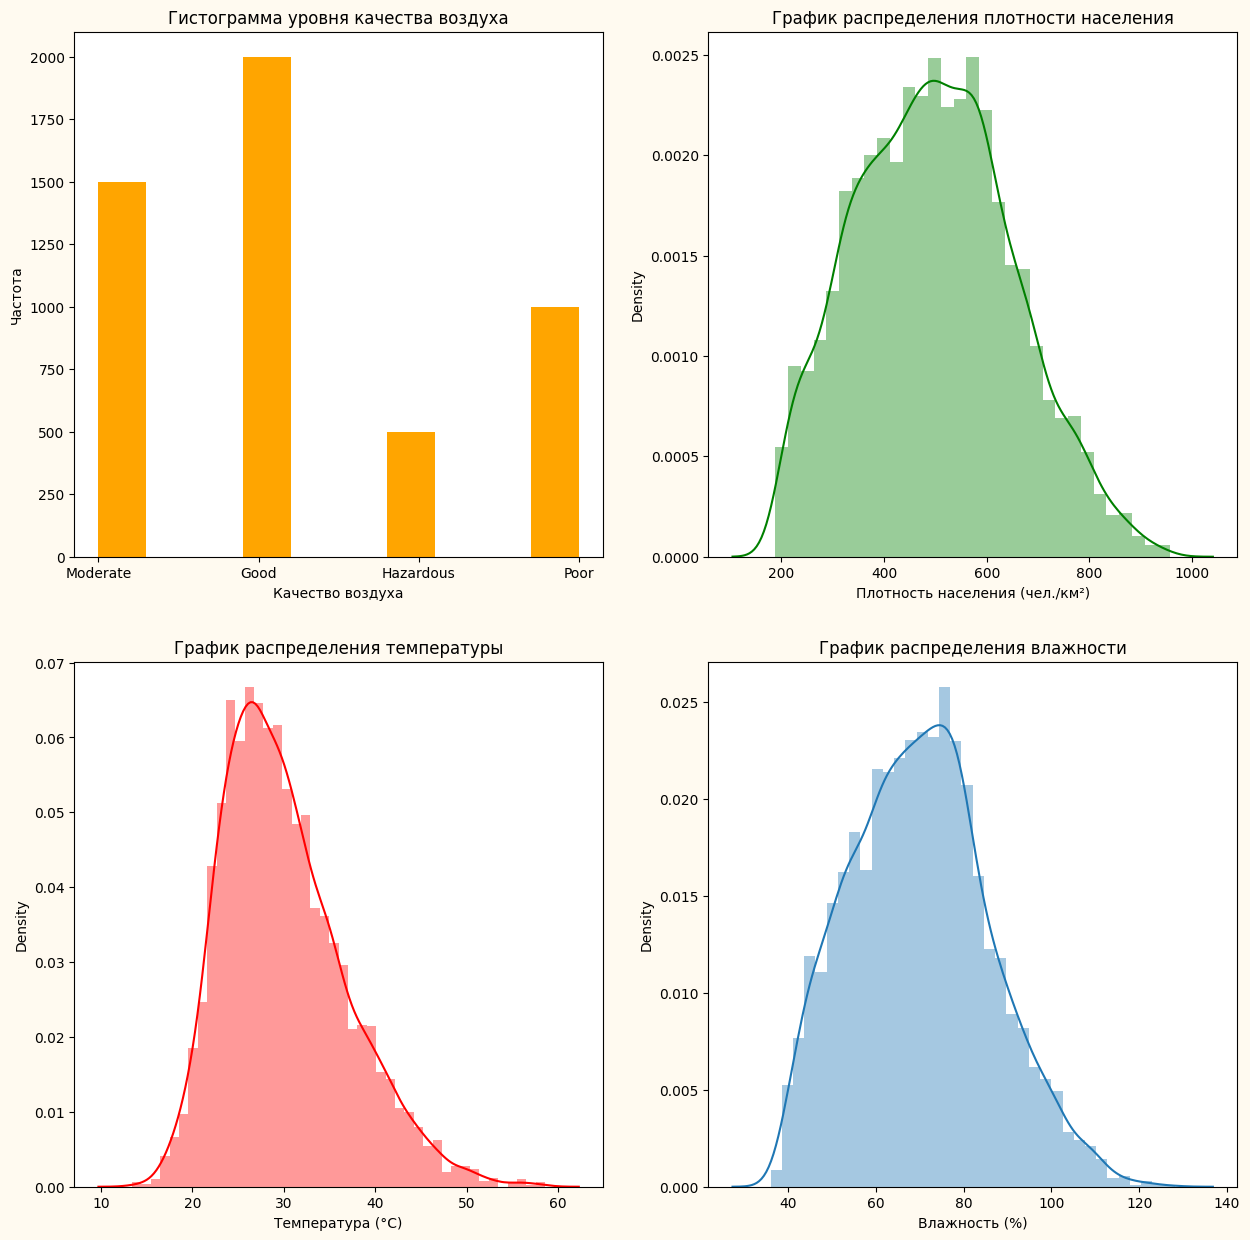

In [3]:
fig, ax = plt.subplots(2,2, figsize=(15, 15))
fig.set_facecolor("floralwhite")
ax[0, 0].hist(x["Air Quality"], color="orange")
ax[0, 0].set_title("Гистограмма уровня качества воздуха")
ax[0, 0].set_xlabel("Качество воздуха")
ax[0, 0].set_ylabel("Частота")
sns.distplot(x["Population_Density"], color='green', ax=ax[0, 1])
ax[0, 1].set_title("График распределения плотности населения")
ax[0, 1].set_xlabel("Плотность населения (чел./км²)")
sns.distplot(x["Temperature"], color='red', ax=ax[1, 0])
ax[1, 0].set_title("График распределения температуры")
ax[1, 0].set_xlabel("Температура (°C)")
sns.distplot(x["Humidity"], ax=ax[1, 1])
ax[1, 1].set_title("График распределения влажности")
ax[1, 1].set_xlabel("Влажность (%)")
plt.show()
#Выводы: благодаря этим графикам мы понимаем каких значений у каждой переменной больше/меньше всего, каких средне и т. д.

№3

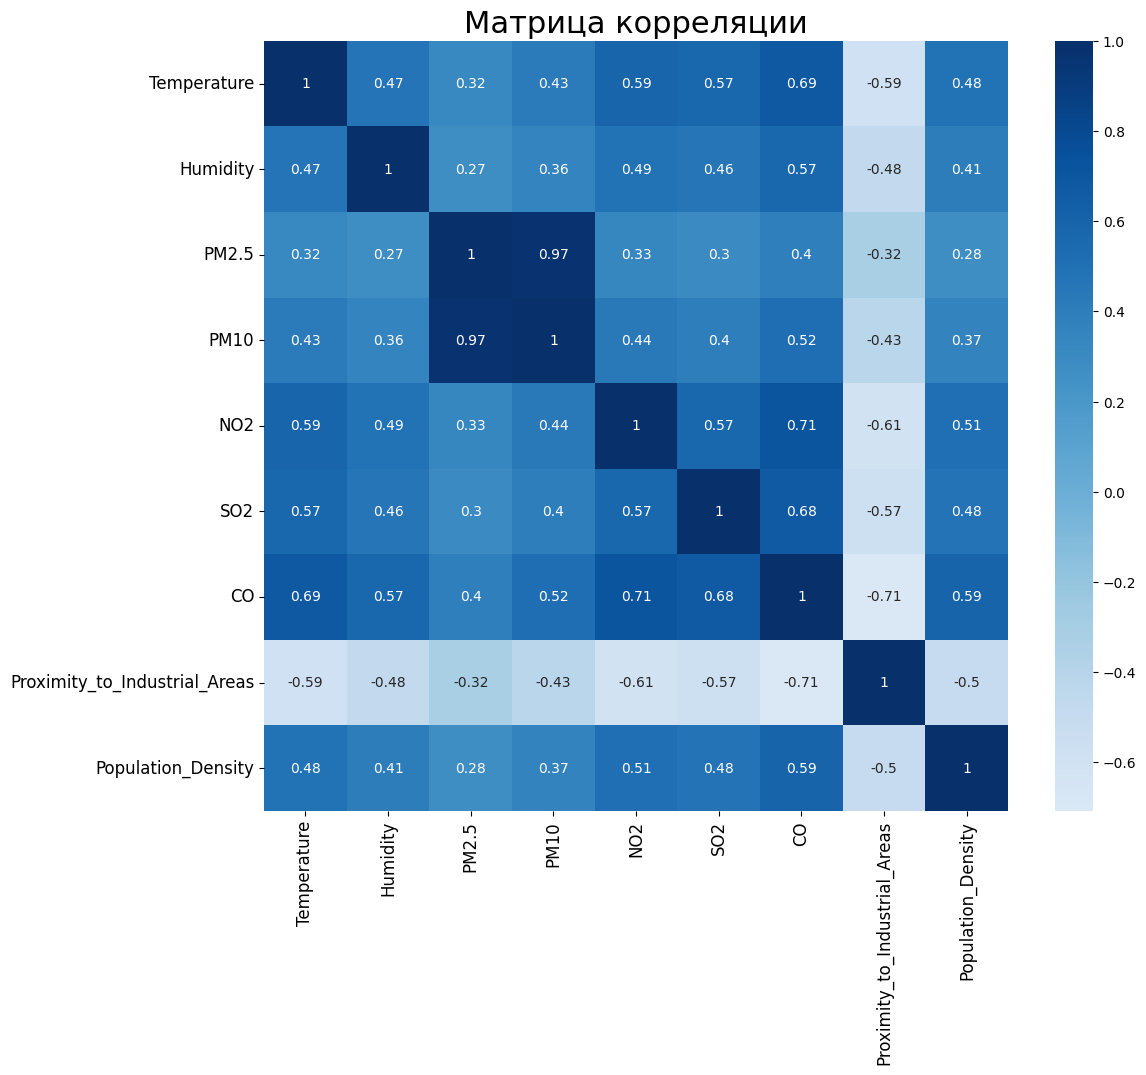

In [4]:
plt.figure(figsize=(12,10))
a = x.corr(numeric_only=True)
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, cmap='Blues', center=0, annot=True)
plt.title("Матрица корреляции", fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#Выводы: переменная PM10 зависит от PM2.5(Уровни мелких твердых частиц)

№4

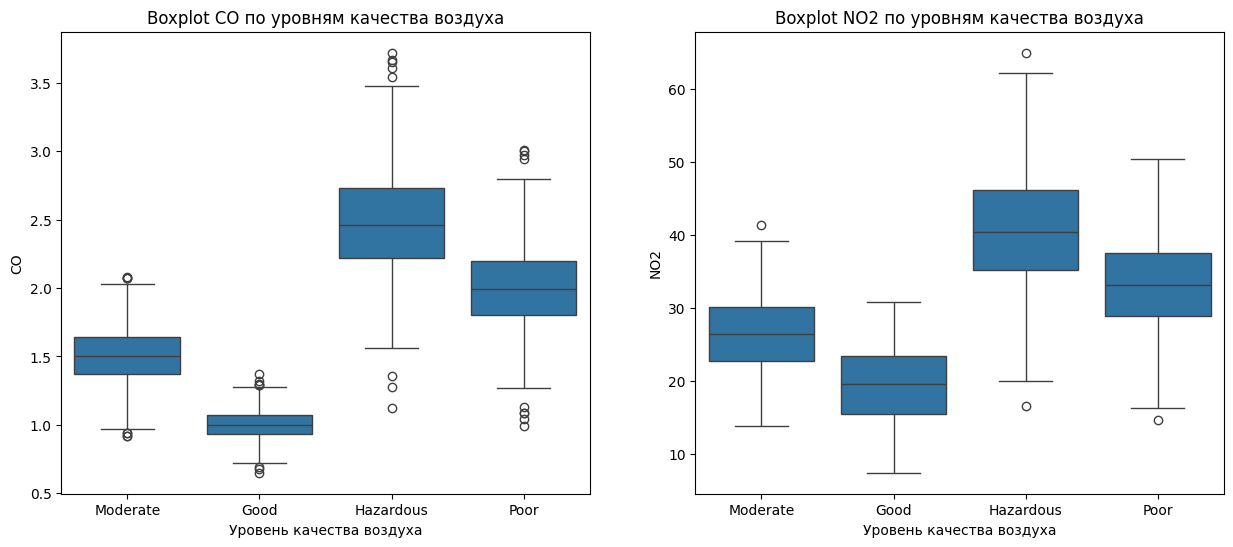

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(x=x["Air Quality"], y=x["CO"], ax=ax[0])
ax[0].set_title("Boxplot CO по уровням качества воздуха")
ax[0].set_xlabel("Уровень качества воздуха")
ax[0].set_ylabel("CO")
sns.boxplot(x=x["Air Quality"], y=x["NO2"], ax=ax[1])
ax[1].set_title("Boxplot NO2 по уровням качества воздуха")
ax[1].set_xlabel("Уровень качества воздуха")
ax[1].set_ylabel("NO2")
plt.show()
#Выводы: выбросов мало, т. к. всего 5000 значений, а выбросы можно пересчитать по пальцам. Для каждого типа воздуха среднее содержание CO и NO2 разное.

№5

<Axes: >

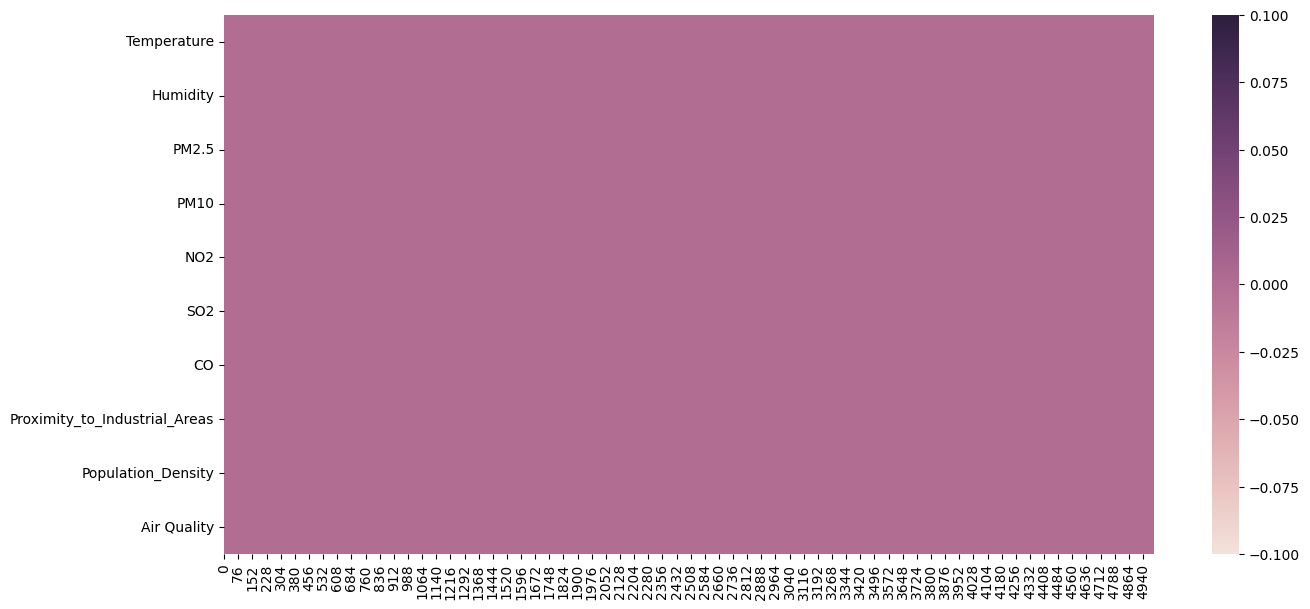

In [6]:
plt.figure(figsize=(15, 7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(x.isna().transpose(), cmap=cmap)
#Выводы: в "pollution_dataset.csv" нет пропусков данных

№6

Text(0, 0.5, 'Среднее значение PM10 (мкг/м³)')

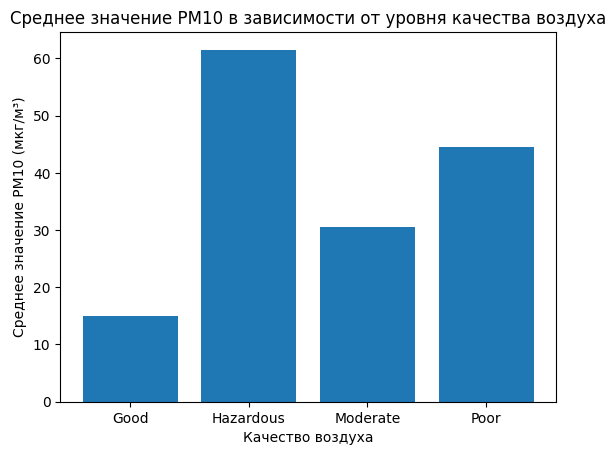

In [7]:
a = x.groupby("Air Quality")["PM10"].mean().reset_index()
fig, ax = plt.subplots()
ax.bar(a["Air Quality"], a["PM10"])
plt.title("Среднее значение PM10 в зависимости от уровня качества воздуха")
plt.xlabel("Качество воздуха")
plt.ylabel("Среднее значение PM10 (мкг/м³)")
#Выводы: среднее значение PM10 у опасного воздуха самое большое, а у хорошего самое маленькое

№7

<Figure size 1000x800 with 0 Axes>

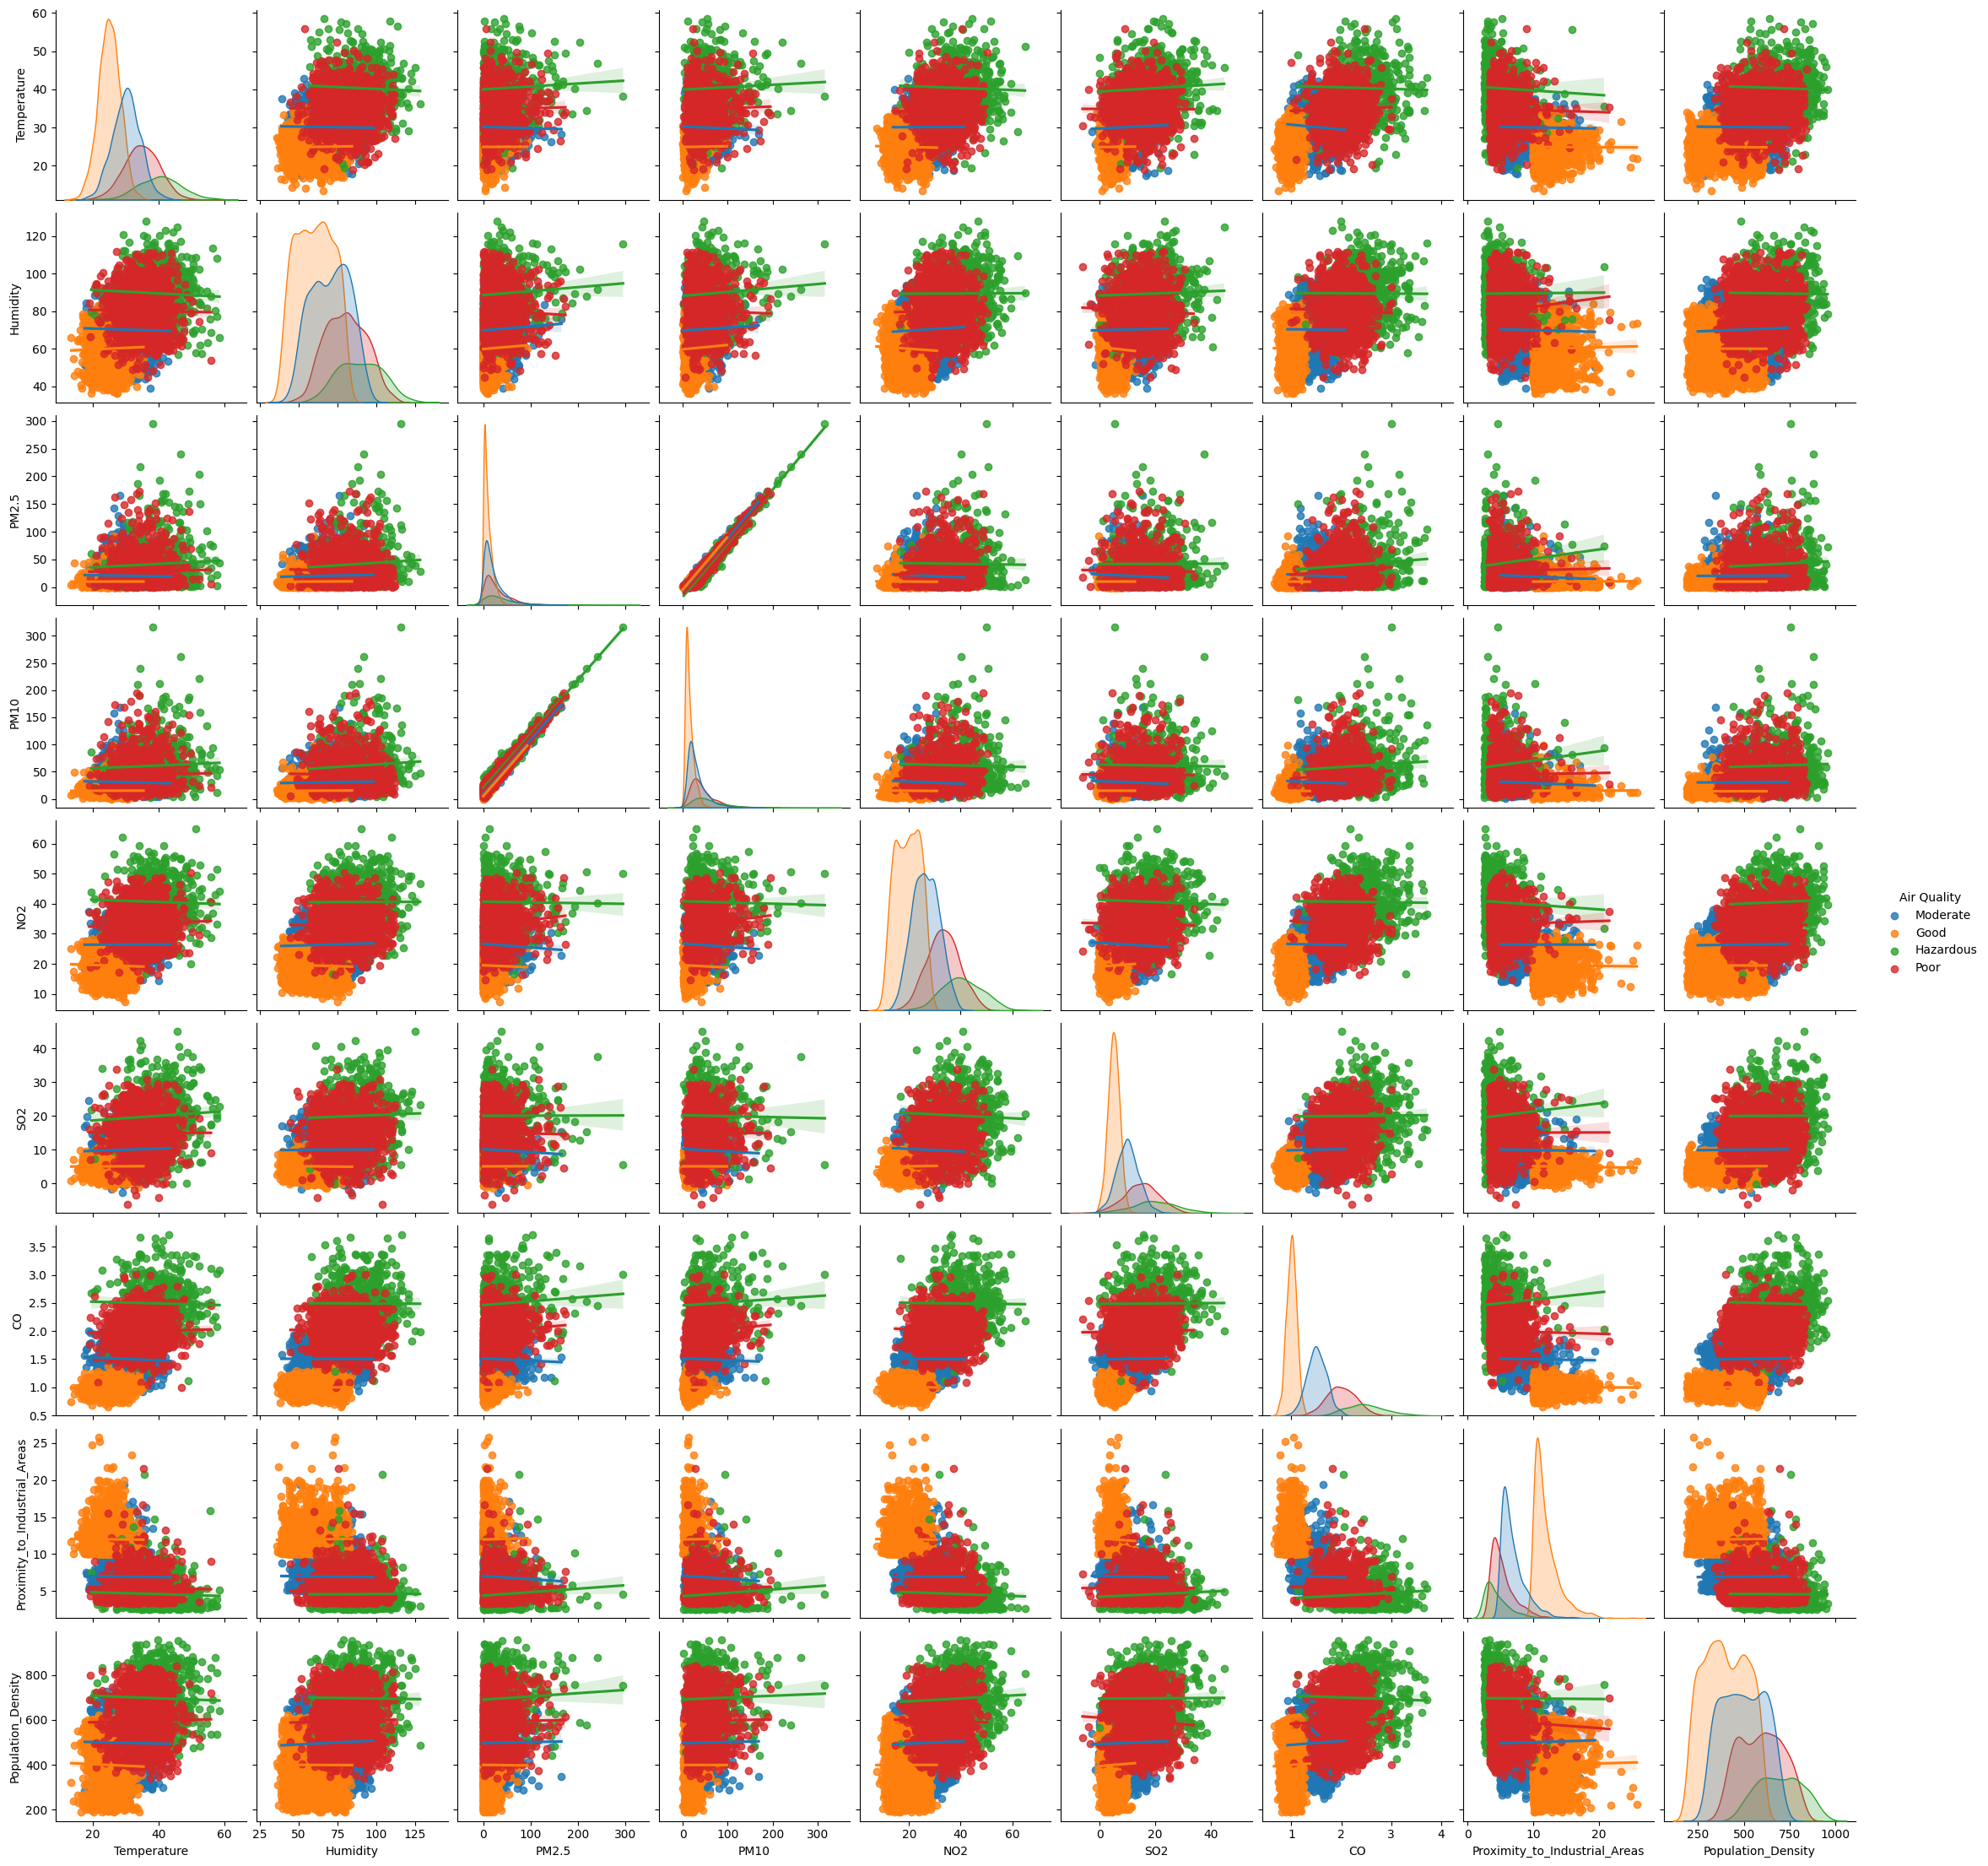

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(x, kind="reg", hue="Air Quality")
plt.show()